### The objective of this project is to collect a dataset from one or more open web APIs of your choice, and use Python to pre-process and analyse the collected data.

In [104]:
import os
import pandas as pd
import json
import simplejson
import json
import urllib.request
import datetime
import time as t
from time import gmtime, strftime
#API that gives the dronestrike information of USA on Pakistan,Yemen and Somalia
url = "http://api.dronestre.am/data"
    
#Data Collection
response = urllib.request.urlopen(url)
raw_json = response.read().decode()
    
#Parsing the JSON data
#JSON file is created with all the data taken from the API
from pprint import pprint
data = json.loads(raw_json)
json_str = json.dumps(data)
jsondata = simplejson.dumps(data, indent=4, skipkeys=True, sort_keys=True)
#Storing the data in json format
fd = open('drones.json', 'w')
fd.write(jsondata)
fd.close()

In [110]:
#Reading Data from the created JSON file
with open('drones.json', 'r') as f:
    dronesStrike = json.load(f)

print(type(dronesStrike))

<class 'dict'>


In [111]:
pprint(dronesStrike)

{'status': 'OK',
 'strike': [{'_id': '55c79e711cbee48856a30886',
             'articles': [],
             'bij_link': 'http://www.thebureauinvestigates.com/2012/03/29/yemen-reported-us-covert-actions-since-2001/',
             'bij_summary_short': 'In the first known US targeted '
                                  'assassination using a drone, a CIA Predator '
                                  'struck a car killing six al Qaeda suspects.',
             'bureau_id': 'YEM001',
             'children': '',
             'civilians': '0',
             'country': 'Yemen',
             'date': '2002-11-03T00:00:00.000Z',
             'deaths': '6',
             'deaths_max': '6',
             'deaths_min': '6',
             'injuries': '',
             'lat': '15.47467',
             'location': 'Marib Province',
             'lon': '45.322755',
             'names': ["Qa'id Salim Sinan al-Harithi, Abu Ahmad al-Hijazi, "
                       'Salih Hussain Ali al-Nunu, Awsan Ahmad al-Tarih

In [112]:
#The data for each country is separated and put in lists

drone = dronesStrike['strike']
#pprint(drone)
pak=[]
for i in drone:
    if(i['country'] == 'Pakistan'):
        pak.append(i)

#print(pak)

yemen=[]
for i in drone:
    if(i['country'] == 'Yemen'):
        yemen.append(i)
        

Somalia=[]
for i in drone:
    if(i['country'] == 'Somalia'):
        Somalia.append(i)
    




In [113]:
#Create DataFrames for pakistan(pakdf),yemendf(yemen),Somaliadf(somalia)

pakdf = pd.DataFrame(pak, columns = ['country','deaths_max','date'])
print(pakdf)
yemendf = pd.DataFrame(yemen, columns = ['country','deaths_max','date'])
print(yemendf)
Somaliadf = pd.DataFrame(Somalia, columns = ['country','deaths_max','date'])






      country deaths_max                      date
0    Pakistan          8  2004-06-17T00:00:00.000Z
1    Pakistan          2  2005-05-08T00:00:00.000Z
2    Pakistan          8  2005-11-05T00:00:00.000Z
3    Pakistan          5  2005-12-01T00:00:00.000Z
4    Pakistan          8  2006-01-06T00:00:00.000Z
5    Pakistan         22  2006-01-13T00:00:00.000Z
6    Pakistan         83  2006-10-30T00:00:00.000Z
7    Pakistan          8  2007-01-16T00:00:00.000Z
8    Pakistan          4  2007-04-27T00:00:00.000Z
9    Pakistan         34  2007-06-19T00:00:00.000Z
10   Pakistan         10  2007-11-02T00:00:00.000Z
11   Pakistan          0  2007-12-03T00:00:00.000Z
12   Pakistan         15  2008-01-29T00:00:00.000Z
13   Pakistan         13  2008-02-28T00:00:00.000Z
14   Pakistan         20  2008-03-16T00:00:00.000Z
15   Pakistan         20  2008-05-14T00:00:00.000Z
16   Pakistan          1  2008-06-14T00:00:00.000Z
17   Pakistan         12  2008-07-28T00:00:00.000Z
18   Pakistan         25  2008-

In [114]:
#Cleaning the data
#The data had white spaces and ? which were removed
import numpy as np
pakdf['deaths_max'].replace("",np.nan,inplace=True)
pakdf['deaths_max'].replace("?",np.nan,inplace=True)
pakdf.dropna(subset=['deaths_max'],inplace=True)
# pakdf['deaths_max'] = pakdf['deaths_max'].astype(int)
# pakdf['deaths_min'] = pakdf['deaths_min'].astype(int)
pprint(pakdf)

#Cleaning the Data

yemendf['deaths_max'].replace("",np.nan,inplace=True)
yemendf['deaths_max'].replace("?",np.nan,inplace=True)
yemendf.dropna(subset=['deaths_max'],inplace=True)
# yemendf['deaths_max'] = yemendf['deaths_max'].astype(int)
# yemendf['deaths_min'] = yemendf['deaths_min'].astype(int)
#yemendf['deaths_max'] = yemendf['deaths_max'].astype(int)
pprint(yemendf)

#Cleaning the Data

Somaliadf['deaths_max'].replace("",np.nan,inplace=True)
Somaliadf['deaths_max'].replace("?",np.nan,inplace=True)
Somaliadf.dropna(subset=['deaths_max'],inplace=True)
pprint(Somaliadf)



      country deaths_max                      date
0    Pakistan          8  2004-06-17T00:00:00.000Z
1    Pakistan          2  2005-05-08T00:00:00.000Z
2    Pakistan          8  2005-11-05T00:00:00.000Z
3    Pakistan          5  2005-12-01T00:00:00.000Z
4    Pakistan          8  2006-01-06T00:00:00.000Z
5    Pakistan         22  2006-01-13T00:00:00.000Z
6    Pakistan         83  2006-10-30T00:00:00.000Z
7    Pakistan          8  2007-01-16T00:00:00.000Z
8    Pakistan          4  2007-04-27T00:00:00.000Z
9    Pakistan         34  2007-06-19T00:00:00.000Z
10   Pakistan         10  2007-11-02T00:00:00.000Z
11   Pakistan          0  2007-12-03T00:00:00.000Z
12   Pakistan         15  2008-01-29T00:00:00.000Z
13   Pakistan         13  2008-02-28T00:00:00.000Z
14   Pakistan         20  2008-03-16T00:00:00.000Z
15   Pakistan         20  2008-05-14T00:00:00.000Z
16   Pakistan          1  2008-06-14T00:00:00.000Z
17   Pakistan         12  2008-07-28T00:00:00.000Z
18   Pakistan         25  2008-

In [115]:
#Changing the death count to integer
pakdf['country'] = pakdf['country'].astype(str)
pakdf['deaths_max'] = pakdf['deaths_max'].astype(str)
pakdf['deaths_max'] = pakdf['deaths_max'].astype(int)

yemendf['deaths_max'] = yemendf['deaths_max'].astype(str)
yemendf['deaths_max'] = yemendf['deaths_max'].astype(int)


#Somaliadf['deaths_max'] = Somaliadf['deaths_max'].astype(str)
#Somaliadf['deaths_max'] = Somaliadf['deaths_max'].astype(int)




In [116]:
#Merging the pakistan dataframe and yemen data frame by the year
#The drones strikes that took place in each year common in pakistan and yemen is in result data frame

yemendf.rename(columns={'country': 'country_yemen', 'deaths_max': 'max_deaths_rate'}, inplace=False)
result = pd.merge(pakdf,yemendf,on='date')
print(result)

   country_x  deaths_max_x                      date country_y  deaths_max_y
0   Pakistan            12  2011-06-03T00:00:00.000Z     Yemen             7
1   Pakistan             6  2011-08-01T00:00:00.000Z     Yemen            16
2   Pakistan             4  2011-09-30T00:00:00.000Z     Yemen             4
3   Pakistan             6  2011-10-14T00:00:00.000Z     Yemen             0
4   Pakistan             6  2011-10-14T00:00:00.000Z     Yemen             9
5   Pakistan             6  2011-10-14T00:00:00.000Z     Yemen            17
6   Pakistan             6  2011-10-14T00:00:00.000Z     Yemen             2
7   Pakistan            15  2012-03-09T00:00:00.000Z     Yemen            34
8   Pakistan             6  2012-03-09T00:00:00.000Z     Yemen            34
9   Pakistan             8  2012-03-13T00:00:00.000Z     Yemen             5
10  Pakistan             7  2012-03-13T00:00:00.000Z     Yemen             5
11  Pakistan             4  2012-03-30T00:00:00.000Z     Yemen             5

In [117]:
#converting object type of "timestamp" to "datatime64[ns]"

result['date'] = result['date'].astype('datetime64[ns]')
    
    #seperates time from timestamp and stores under the cloumn "time"
    #new column "time" appendes ndf
result['date'] = result['date'].dt.year

In [118]:
#Parsing the Final result data frame
result.dtypes.value_counts()
#df['jobs'] = df['jobs'].astype(int)
result['deaths_max_x'] = result['deaths_max_x'].astype(str)
result['deaths_max_y'] = result['deaths_max_y'].astype(str)
result['deaths_max_x'] = result['deaths_max_x'].astype(int)
result['deaths_max_y'] = result['deaths_max_y'].astype(int)


In [119]:
result.set_index(['date'],inplace=True)
#dub.set_index(['time'],inplace=True)


# Final Pre-Processing steps

In [120]:
result.dtypes.value_counts()

int64     2
object    2
dtype: int64

In [121]:

result.isnull().sum()

country_x       0
deaths_max_x    0
country_y       0
deaths_max_y    0
dtype: int64

In [122]:
result[0:len(result)]

,country_x,deaths_max_x,country_y,deaths_max_y
date,,,,
2011,Pakistan,12,Yemen,7
2011,Pakistan,6,Yemen,16
2011,Pakistan,4,Yemen,4
2011,Pakistan,6,Yemen,0
2011,Pakistan,6,Yemen,9
2011,Pakistan,6,Yemen,17
2011,Pakistan,6,Yemen,2
2012,Pakistan,15,Yemen,34
2012,Pakistan,6,Yemen,34


In [123]:
print("Descriptive Stats:\n")
print(result.describe())

Descriptive Stats:

       deaths_max_x  deaths_max_y
count     24.000000     24.000000
mean       6.208333      9.083333
std        3.006936      8.977831
min        2.000000      0.000000
25%        4.000000      4.750000
50%        6.000000      5.000000
75%        6.250000      9.750000
max       15.000000     34.000000


# Plotting the graph

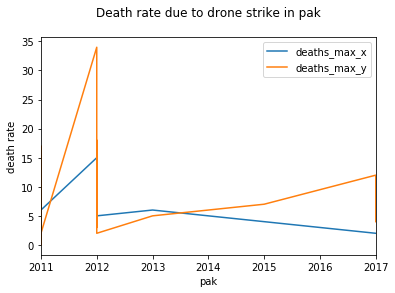

In [124]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
result.plot()
plt.title("Death rate due to drone strike in pak\n")
plt.ylabel("death rate")
plt.xlabel("year")
plt.show()

#The graph describes the death rate by drones strike on Pakistan and Yemen by USA from 2011-2017


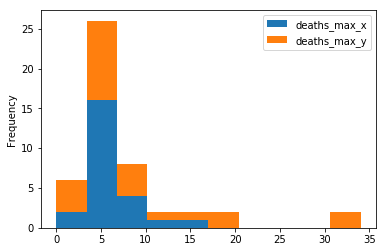

In [125]:
result.plot.hist(stacked=True)

#The graph describes the death rate by drones strike on Pakistan and Yemen by USA from 2011-2017


# Final analysis:


In [ ]:
#From the above two graphsWe can see that the drones strike in Yemen is much more than that of pakistan mainly 
#in the years 2011-2012
#Now in the recent years the death by drones strike has increased till the years 2016 in both yemen and pakistan
#After the US elections the USA has reduced its drones strike on yemen and pakistan which is visible from the graph
#as there is drop in the drone strikes on both countries